In [3]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [30]:
import json

from scipy.stats import sem

seme = lambda x: 1.2533 * sem(x)  # Standard error of median function
import numpy as np

with open("./results/importance_sampling.json", "r") as file:
    results = json.load(file)

In [32]:
model_names = ["base_score", "importance_score", "random_score"]
data = dict()
for item in results:
    data[item] = dict()
    try:
        for model_name in model_names:
            data[item][model_name] = results[item][model_name]
    except:
        pass
data = pd.DataFrame(data).transpose()

print(data.median())
print(1.253 * data.sem(), "\n")  # standard error of the median


model_names = ["base_time", "importance_time", "random_time"]
data = dict()
for item in results:
    data[item] = dict()
    try:
        for model_name in model_names:
            data[item][model_name] = results[item][model_name]
    except:
        pass
data = pd.DataFrame(data).transpose()

print(data.median())
print(1.253 * data.sem())  # standard error of the median

base_score          1.002115
importance_score    0.908937
random_score        0.985666
dtype: float64
base_score          0.054580
importance_score    0.054464
random_score        0.054757
dtype: float64 

base_time          190.124137
importance_time     94.608197
random_time         77.949715
dtype: float64
base_time          0.308114
importance_time    0.188631
random_time        0.331367
dtype: float64


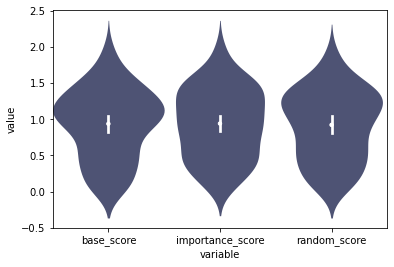

In [26]:
import seaborn as sns

data_long = pd.melt(data, value_vars=model_names)
ax = sns.violinplot(
    data=data_long,
    x="variable",
    y="value",
    linewidth=0,
    size=3,
    alpha=0.1,
    split=True,
    width=1,
    order=model_names,
    scale="area",
    inner=None,
    color=[71 / 255.0, 78 / 255.0, 123 / 255.0],
)

ax = sns.pointplot(
    data=data_long,
    x="variable",
    y="value",
    order=model_names,
    linewidth=0,
    size=0.1,
    scale=0.5,
    palette={"w"},
    join=False,
    ci=99,
)

In [18]:
results[item]

{}

In [5]:
summary_stats

{'base_score': (1.0021148404579692, 0.05459349593066693),
 'importance_score': (0.9089366720137474, 0.054476572822865055),
 'random_score': (0.9856664675420069, 0.05477055659363703)}